In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Replace the file path with your actual CSV location if needed
df = pd.read_csv('cleanedReport.csv')

# Show first few rows
df.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Time_slot,Drop_timestamp,Hour_of_day,weekday
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51,Day,11-07-2016 13:00,11,Monday
1,867,Airport,1.0,Trip Completed,11-07-2016 17:57,Night,11-07-2016 18:47,17,Monday
2,1807,City,1.0,Trip Completed,12-07-2016 09:17,Day,12-07-2016 09:58,9,Tuesday
3,2532,Airport,1.0,Trip Completed,12-07-2016 21:08,Night,12-07-2016 22:03,21,Tuesday
4,3112,City,1.0,Trip Completed,13-07-2016 08:33,Day,13-07-2016 09:25,8,Wednesday


In [3]:
df['Request_timestamp'] = pd.to_datetime(df['Request_timestamp'], format='%d-%m-%Y %H:%M', errors='coerce')
df['Drop_timestamp'] = pd.to_datetime(df['Drop_timestamp'], format='%d-%m-%Y %H:%M', errors='coerce')

In [4]:
# 1. Trip Duration
df['Trip_duration'] = (df['Drop_timestamp'] - df['Request_timestamp']).dt.total_seconds() / 60

# 2. Demand-Supply Issue
df['Issue'] = df['Status'].isin(['Cancelled', 'No Cars Available'])

# 3. Weekend Flag
df['is_weekend'] = df['weekday'].isin(['Saturday', 'Sunday'])

# 4. Derived Time Slot (optional fix for 'Unavailable')
def fill_time_slot(row):
    if row['Time_slot'] != 'Unavailable':
        return row['Time_slot']
    hour = row['Hour_of_day']
    if 4 <= hour <= 7:
        return 'Early Morning'
    elif 8 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 16:
        return 'Day'
    elif 17 <= hour <= 20:
        return 'Evening'
    elif 21 <= hour <= 23:
        return 'Night'
    else:
        return 'Late Night'

df['Time_slot_filled'] = df.apply(fill_time_slot, axis=1)

In [5]:
print(df.describe())
print(df['Status'].value_counts())
print(df['Time_slot'].value_counts())

        Request_id    Driver_id              Request_timestamp  \
count  5481.000000  2831.000000                           5481   
mean   3444.692757   148.328859  2016-07-13 14:43:45.265462528   
min       1.000000     1.000000            2016-07-11 00:00:00   
25%    1752.000000    74.000000            2016-07-12 08:32:00   
50%    3483.000000   149.000000            2016-07-13 17:19:00   
75%    5141.000000   223.000000            2016-07-14 20:14:00   
max    6766.000000   300.000000            2016-07-15 23:59:00   
std    1961.883990    86.352627                            NaN   

                      Drop_timestamp  Hour_of_day  Trip_duration  
count                           2831  5481.000000    2831.000000  
mean   2016-07-13 13:15:16.404097536    13.773034      52.411515  
min              2016-07-11 00:51:00     0.000000      21.000000  
25%              2016-07-12 07:42:00     8.000000      41.000000  
50%              2016-07-13 12:14:00    16.000000      52.000000  
75%

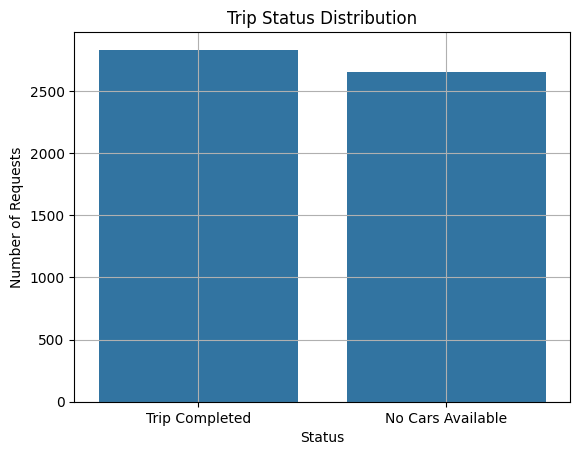

In [6]:
sns.countplot(x='Status', data=df)
plt.title("Trip Status Distribution")
plt.ylabel("Number of Requests")
plt.grid(True)
plt.show()

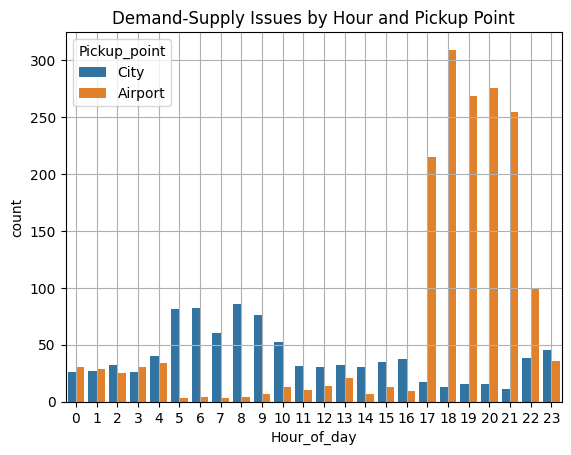

In [7]:
sns.countplot(x='Hour_of_day', data=df[df['Issue']], hue='Pickup_point')
plt.title("Demand-Supply Issues by Hour and Pickup Point")
plt.grid(True)
plt.show()

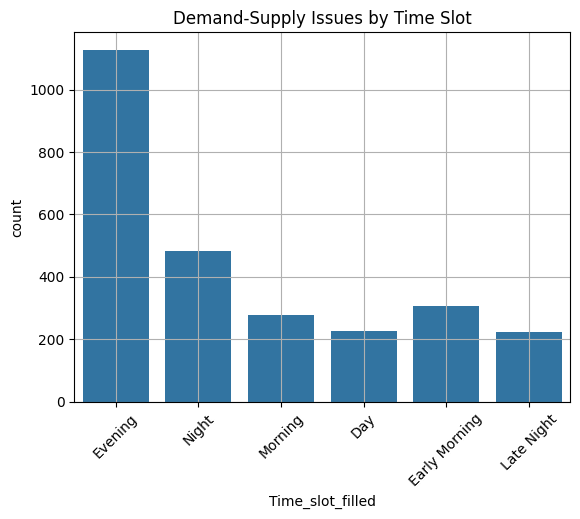

In [8]:
sns.countplot(x='Time_slot_filled', data=df[df['Issue']], order=df['Time_slot_filled'].value_counts().index)
plt.title("Demand-Supply Issues by Time Slot")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

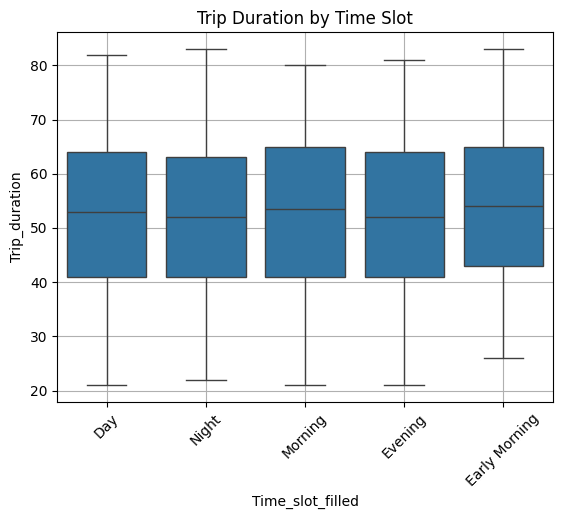

In [9]:
sns.boxplot(x='Time_slot_filled', y='Trip_duration', data=df[df['Status'] == 'Trip Completed'])
plt.title("Trip Duration by Time Slot")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()